In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
dir = '/home/shoshi/MITgcm_c68p/llc90/profiles_obsfit_test/input_obsfit/'
argo = xr.open_dataset(dir + 'ARGO_20190131_July15.nc')
argo

<xarray.Dataset>
Dimensions:                      (iPROF: 13297, iDEPTH: 55, iINTERP: 1)
Dimensions without coordinates: iPROF, iDEPTH, iINTERP
Data variables: (12/36)
    prof_HHMMSS                  (iPROF) float64 ...
    prof_S                       (iPROF, iDEPTH) float64 ...
    prof_Sclim                   (iPROF, iDEPTH) float64 ...
    prof_Serr                    (iPROF, iDEPTH) float64 ...
    prof_Sestim                  (iPROF, iDEPTH) float64 ...
    prof_Sflag                   (iPROF, iDEPTH) float64 ...
    ...                           ...
    prof_interp_lon              (iPROF, iINTERP) float64 ...
    prof_interp_weights          (iPROF, iINTERP) float64 ...
    prof_lat                     (iPROF) float64 ...
    prof_lon                     (iPROF) float64 ...
    prof_point                   (iPROF) float64 ...
    prof_spatial_scaling_factor  (iPROF) float64 ...
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         01-Feb-2019

In [3]:
# select SST data only
argo = argo.isel(iDEPTH=0)
argo

<xarray.Dataset>
Dimensions:                      (iPROF: 13297, iINTERP: 1)
Dimensions without coordinates: iPROF, iINTERP
Data variables: (12/36)
    prof_HHMMSS                  (iPROF) float64 ...
    prof_S                       (iPROF) float64 ...
    prof_Sclim                   (iPROF) float64 ...
    prof_Serr                    (iPROF) float64 ...
    prof_Sestim                  (iPROF) float64 ...
    prof_Sflag                   (iPROF) float64 ...
    ...                           ...
    prof_interp_lon              (iPROF, iINTERP) float64 ...
    prof_interp_weights          (iPROF, iINTERP) float64 ...
    prof_lat                     (iPROF) float64 ...
    prof_lon                     (iPROF) float64 ...
    prof_point                   (iPROF) float64 ...
    prof_spatial_scaling_factor  (iPROF) float64 ...
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         01-Feb-2019

In [15]:
obs = xr.Dataset(
    data_vars=dict(
        obs_date           =(["iOBS"], argo.prof_date.values),
        obs_YYYYMMDD       =(["iOBS"], argo.prof_YYYYMMDD.values),
        obs_HHMMSS         =(["iOBS"], argo.prof_HHMMSS.values), 
        #obs_np             =(["iOBS"], argo.obs_np),
        sample_x           =(["iSAMPLE"], argo.prof_lon.values),
        sample_y           =(["iSAMPLE"], argo.prof_lat.values),
        sample_z           =(["iSAMPLE"], np.zeros(np.shape(argo.prof_lat))),
        sample_type        =(["iSAMPLE"], np.ones(np.shape(argo.prof_lat))*5),
        #sample_weight      =(["iSAMPLE"], argo.sample_weight), 
        obs_val            =(["iOBS"], argo.prof_T.values),
        obs_weight         =(["iOBS"], np.ones(np.shape(argo.prof_T))),
        sample_interp_XC11 =(["iSAMPLE"], argo.prof_interp_XC11.values ),
        sample_interp_YC11 =(["iSAMPLE"], argo.prof_interp_YC11.values ),
        sample_interp_XCNINJ =(["iSAMPLE"], argo.prof_interp_XCNINJ.values ),
        sample_interp_YCNINJ =(["iSAMPLE"], argo.prof_interp_YCNINJ.values ),
        sample_interp_i =(["iSAMPLE"], argo.prof_interp_i.values[:,0] ),
        sample_interp_j =(["iSAMPLE"], argo.prof_interp_j.values[:,0] ),
        sample_interp_w =(["iSAMPLE", "iINTERP"], np.ones((len(argo.prof_interp_i),8))/8 )
    ),
)

obs

<xarray.Dataset>
Dimensions:               (iOBS: 13297, iSAMPLE: 13297, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 7.361e+05 7.361e+05 ... 7.362e+05
    obs_YYYYMMDD          (iOBS) float64 2.015e+07 2.015e+07 ... 2.015e+07
    obs_HHMMSS            (iOBS) float64 400.0 457.0 ... 2.355e+05 2.358e+05
    sample_x              (iSAMPLE) float64 -17.47 73.48 119.6 ... 18.04 170.1
    sample_y              (iSAMPLE) float64 2.155 -19.11 19.47 ... 42.32 -11.19
    sample_z              (iSAMPLE) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                    ...
    sample_interp_YC11    (iSAMPLE) float64 -9.482 -36.8 10.46 ... 37.59 -10.46
    sample_interp_XCNINJ  (iSAMPLE) float64 -8.5 81.5 141.5 ... 141.5 21.5 171.5
    sample_interp_YCNINJ  (iSAMPLE) float64 9.482 -10.46 36.8 ... 56.74 -36.8
    sample_interp_i       (iSAMPLE) float64 21.0 22.0 8.0 5.0 ... 14.0 27.0 2.0
    sample_interp_j       (iSAMPLE) float64 20.0 21.0 10.0 ... 15.0 7.0 29.0
    sample_interp_w       (iSAMPLE, iINTERP) float64 0.125 0.125 ... 0.125 0.125

In [13]:
obs = obs.isel(iOBS=slice(0,3), iSAMPLE=slice(0,3))
obs['obs_weight'].values = np.array([np.nan, 1, 1])
obs


<xarray.Dataset>
Dimensions:               (iOBS: 3, iSAMPLE: 3, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 7.361e+05 7.361e+05 7.361e+05
    obs_YYYYMMDD          (iOBS) float64 2.015e+07 2.015e+07 2.015e+07
    obs_HHMMSS            (iOBS) float64 400.0 457.0 708.0
    sample_x              (iSAMPLE) float64 -17.47 73.48 119.6
    sample_y              (iSAMPLE) float64 2.155 -19.11 19.47
    sample_z              (iSAMPLE) float64 0.0 0.0 0.0
    ...                    ...
    sample_interp_YC11    (iSAMPLE) float64 -9.482 -36.8 10.46
    sample_interp_XCNINJ  (iSAMPLE) float64 -8.5 81.5 141.5
    sample_interp_YCNINJ  (iSAMPLE) float64 9.482 -10.46 36.8
    sample_interp_i       (iSAMPLE) float64 21.0 22.0 8.0
    sample_interp_j       (iSAMPLE) float64 20.0 21.0 10.0
    sample_interp_w       (iSAMPLE, iINTERP) float64 0.125 0.125 ... 0.125 0.125

In [17]:
# change obs_weight to nan where obs_val = nan
obs['obs_weight'] = obs['obs_weight'].where(~np.isnan(obs['obs_val']), np.nan)
obs


<xarray.Dataset>
Dimensions:               (iOBS: 13297, iSAMPLE: 13297, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 7.361e+05 7.361e+05 ... 7.362e+05
    obs_YYYYMMDD          (iOBS) float64 2.015e+07 2.015e+07 ... 2.015e+07
    obs_HHMMSS            (iOBS) float64 400.0 457.0 ... 2.355e+05 2.358e+05
    sample_x              (iSAMPLE) float64 -17.47 73.48 119.6 ... 18.04 170.1
    sample_y              (iSAMPLE) float64 2.155 -19.11 19.47 ... 42.32 -11.19
    sample_z              (iSAMPLE) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                    ...
    sample_interp_YC11    (iSAMPLE) float64 -9.482 -36.8 10.46 ... 37.59 -10.46
    sample_interp_XCNINJ  (iSAMPLE) float64 -8.5 81.5 141.5 ... 141.5 21.5 171.5
    sample_interp_YCNINJ  (iSAMPLE) float64 9.482 -10.46 36.8 ... 56.74 -36.8
    sample_interp_i       (iSAMPLE) float64 21.0 22.0 8.0 5.0 ... 14.0 27.0 2.0
    sample_interp_j       (iSAMPLE) float64 20.0 21.0 10.0 ... 15.0 7.0 29.0
    sample_interp_w       (iSAMPLE, iINTERP) float64 0.125 0.125 ... 0.125 0.125

In [18]:
obs.to_netcdf('/home/shoshi/MITgcm_c68p/llc90/profiles_obsfit_test/input_obsfit/obsfit_SSH.nc')

## Build obsfit xarray from profiles dataset

In [25]:
# rename dimensions and variables for obsfit
argo = argo.rename_dims({'iPROF':'iOBS'})

prof_vars = list(argo.data_vars)
obs_vars = [i.replace('prof_', 'obs_') for i in prof_vars]
dict_vars = {prof_vars[i]: obs_vars[i] for i in range(len(prof_vars))}

argo = argo.rename_vars(dict_vars)

old_vars = list(argo.data_vars)
new_vars = [i.replace('obs_interp_', 'sample_interp_') for i in old_vars]
dict_vars = {old_vars[i]: new_vars[i] for i in range(len(old_vars))}

argo = argo.rename_vars(dict_vars)
argo

<xarray.Dataset>
Dimensions:                     (iOBS: 13297, iINTERP: 1)
Dimensions without coordinates: iOBS, iINTERP
Data variables: (12/36)
    obs_HHMMSS                  (iOBS) float64 ...
    obs_S                       (iOBS) float64 ...
    obs_Sclim                   (iOBS) float64 ...
    obs_Serr                    (iOBS) float64 ...
    obs_Sestim                  (iOBS) float64 ...
    obs_Sflag                   (iOBS) float64 ...
    ...                          ...
    sample_interp_lon           (iOBS, iINTERP) float64 ...
    sample_interp_weights       (iOBS, iINTERP) float64 ...
    obs_lat                     (iOBS) float64 ...
    obs_lon                     (iOBS) float64 ...
    obs_point                   (iOBS) float64 ...
    obs_spatial_scaling_factor  (iOBS) float64 ...
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         01-Feb-2019

In [26]:
# add variables needed for obsfit

argo = argo.assign(sample_x=argo['obs_lon'])
argo = argo.assign(sample_y=argo['obs_lat'])
argo = argo.assign(sample_z=argo['obs_lat']*0.)
argo = argo.assign(sample_type=argo['sample_z']+5)
argo = argo.assign(sample_interp_w=argo['sample_z']+1)
argo

<xarray.Dataset>
Dimensions:                     (iOBS: 13297, iINTERP: 1)
Dimensions without coordinates: iOBS, iINTERP
Data variables: (12/41)
    obs_HHMMSS                  (iOBS) float64 ...
    obs_S                       (iOBS) float64 ...
    obs_Sclim                   (iOBS) float64 ...
    obs_Serr                    (iOBS) float64 ...
    obs_Sestim                  (iOBS) float64 ...
    obs_Sflag                   (iOBS) float64 ...
    ...                          ...
    obs_spatial_scaling_factor  (iOBS) float64 ...
    sample_x                    (iOBS) float64 ...
    sample_y                    (iOBS) float64 ...
    sample_z                    (iOBS) float64 0.0 -0.0 0.0 ... 0.0 0.0 -0.0
    sample_type                 (iOBS) float64 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0
    sample_interp_w             (iOBS) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         01-Feb-2019

In [ ]:
# argo.drop(['obs_Tflag'])
# list(argo.keys())
# argo = argo.expand_dims({'iSAMPLE': np.arange(13297)})
# argo.drop_vars('iSAMPLE')

In [27]:
# only look at data in runtime

obs_date = argo['obs_YYYYMMDD']
mask = obs_date == 20150701
argo_0701 = argo.where(mask, drop=True)
argo_0701

obs_time = argo_0701['obs_HHMMSS']
mask = obs_time <= 20000
argo_intime = argo_0701.where(mask, drop=True)
# argo_intime = argo.sel(obs_YYYYMMDD=20150701)
argo_intime

<xarray.Dataset>
Dimensions:                     (iOBS: 32, iINTERP: 1)
Dimensions without coordinates: iOBS, iINTERP
Data variables: (12/41)
    obs_HHMMSS                  (iOBS) float64 400.0 457.0 ... 1.543e+04
    obs_S                       (iOBS) float64 nan 34.43 33.89 ... 35.94 nan nan
    obs_Sclim                   (iOBS) float64 35.42 34.94 33.47 ... 35.34 33.25
    obs_Serr                    (iOBS) float64 0.005 0.005 0.005 ... 0.005 0.005
    obs_Sestim                  (iOBS) float64 35.57 34.9 33.73 ... 35.38 33.15
    obs_Sflag                   (iOBS) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                          ...
    obs_spatial_scaling_factor  (iOBS) float64 0.1429 0.25 ... 0.3333 0.1429
    sample_x                    (iOBS) float64 -17.47 73.48 ... -173.6 164.0
    sample_y                    (iOBS) float64 2.155 -19.11 ... 27.58 42.55
    sample_z                    (iOBS) float64 0.0 -0.0 0.0 -0.0 ... 0.0 0.0 0.0
    sample_type                 (iOBS) float64 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0
    sample_interp_w             (iOBS) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes:
    description:  Format: MITprof netcdf. This file was created using \nthe m...
    date:         01-Feb-2019

<Axes: xlabel='obs_lat', ylabel='obs_lon'>

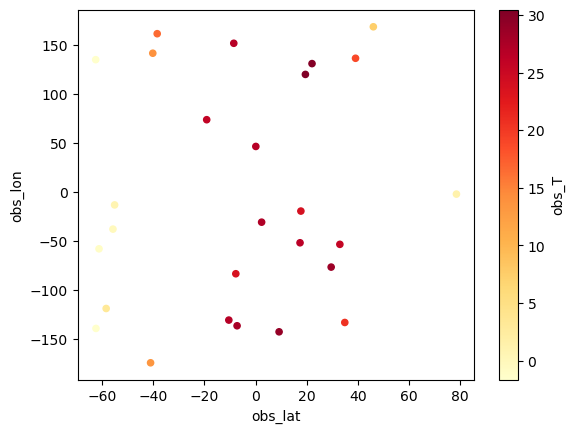

In [8]:
df = argo_intime.to_dataframe()
df.plot(x="obs_lat", y="obs_lon", kind="scatter", c="obs_T",
         colormap="YlOrRd")

In [28]:
obsT = argo_intime.obs_T.values
len(obsT[~np.isnan(obsT)])

27

In [ ]:
#argo.to_netcdf(dir + 'ARGO_20190131_July15_obsfit.nc')


In [29]:
# read in xc, yc data

def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f4'))
        print(np.shape(data))
    return data

dir = '/scratch/shoshi/MITgcm_c68p/llc90/run_obsfit_pk0000205956_D/'
xc = read_float32(dir + 'XC.data')
xc

dir = '/scratch/shoshi/MITgcm_c68p/llc90/run_obsfit_pk0000205956_D/'
yc = read_float32(dir + 'YC.data')
yc

# print(np.unique(np.isin(argo.sample_interp_XC11.values, xc)))
# print(np.unique(np.isin(argo.sample_interp_XCNINJ.values, xc)))
# print(np.unique(np.isin(argo.sample_interp_YC11.values, yc)))
# print(np.unique(np.isin(argo.sample_interp_YCNINJ.values, yc)))

(105300,)
(105300,)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
np.unique(argo.sample_interp_w.values)

array([1.])

In [31]:
np.unique(argo.sample_interp_j.values)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.])

In [32]:
argo.obs_depth.values

array([5., 5., 5., ..., 5., 5., 5.])

# Explore iOBS vs iSAMPLE in verification model

In [21]:
obsfit_SSH = xr.open_dataset('/home/shoshi/MITgcm_c68p/MITgcm/verification/global_oce_biogeo_bling/input_obsfit/obsfit_SSH.nc')
obsfit_SSH

<xarray.Dataset>
Dimensions:       (iOBS: 10980, iSAMPLE: 10980)
Dimensions without coordinates: iOBS, iSAMPLE
Data variables:
    obs_date      (iOBS) float64 ...
    obs_YYYYMMDD  (iOBS) float64 ...
    obs_HHMMSS    (iOBS) float64 ...
    sample_x      (iSAMPLE) float64 ...
    sample_y      (iSAMPLE) float64 ...
    sample_z      (iSAMPLE) float64 ...
    sample_type   (iSAMPLE) float64 ...
    obs_val       (iOBS) float64 ...
    obs_weight    (iOBS) float64 ...

In [ ]:
obsfit_SSH = xr.open_dataset('/home/shoshi/MITgcm_c68p/MITgcm/verification/global_oce_biogeo_bling/input_obsfit/obsfit_SSH.nc')
tmp=obsfit_SSH.to_dataframe()
tmp

In [ ]:
tmp2 = tmp.loc[tmp.index.get_level_values('iSAMPLE') == 0]
tmp2

In [ ]:
tmp2.drop_duplicates()

## Build off of Matt's obsfit obfit

In [11]:
dir = '/scratch/goldberg/llc90/vnc_36x42x50/run_template/input_obsfit/'
dummy_obs = xr.open_dataset(dir + 'dummy_obsfit_etan.nc')
dummy_obs

<xarray.Dataset>
Dimensions:               (iOBS: 1, iSAMPLE: 1, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/15)
    obs_date              (iOBS) float64 ...
    obs_YYYYMMDD          (iOBS) float64 ...
    obs_HHMMSS            (iOBS) int64 ...
    sample_x              (iSAMPLE) float64 ...
    sample_y              (iSAMPLE) float64 ...
    sample_z              (iSAMPLE) int64 ...
    ...                    ...
    sample_interp_YC11    (iOBS) float64 ...
    sample_interp_XCNINJ  (iOBS) float64 ...
    sample_interp_YCNINJ  (iOBS) float64 ...
    sample_interp_i       (iOBS) int64 ...
    sample_interp_j       (iOBS) int64 ...
    sample_interp_w       (iOBS, iINTERP) float64 ...

In [15]:
obs = xr.Dataset(
    data_vars=dict(
        obs_date           =(["iOBS"], dummy_obs.obs_date.values),
        obs_YYYYMMDD       =(["iOBS"], dummy_obs.obs_YYYYMMDD.values),
        obs_HHMMSS         =(["iOBS"], dummy_obs.obs_HHMMSS.values), 
        #obs_np             =(["iOBS"], dummy_obs.obs_np),
        sample_x           =(["iSAMPLE"], dummy_obs.sample_x.values),
        sample_y           =(["iSAMPLE"], dummy_obs.sample_y.values),
        sample_z           =(["iSAMPLE"], dummy_obs.sample_z.values),
        sample_type        =(["iSAMPLE"], dummy_obs.sample_type.values),
        #sample_weight      =(["iSAMPLE"], dummy_obs.sample_weight), 
        obs_val            =(["iOBS"], dummy_obs.obs_val.values),
        obs_weight         =(["iOBS"], np.array([1])),
        sample_interp_XC11 =(["iOBS"], dummy_obs.sample_interp_XC11.values ),
        sample_interp_YC11 =(["iOBS"], dummy_obs.sample_interp_YC11.values ),
        sample_interp_XCNINJ =(["iOBS"], dummy_obs.sample_interp_XCNINJ.values ),
        sample_interp_YCNINJ =(["iOBS"], dummy_obs.sample_interp_YCNINJ.values ),
        sample_interp_i =(["iOBS"], dummy_obs.sample_interp_i.values ),
        sample_interp_j =(["iOBS"], dummy_obs.sample_interp_j.values ),
        sample_interp_w =(["iOBS", "iINTERP"], dummy_obs.sample_interp_w.values )
    ),
)

In [16]:
obs

<xarray.Dataset>
Dimensions:               (iOBS: 1, iSAMPLE: 1, iINTERP: 8)
Dimensions without coordinates: iOBS, iSAMPLE, iINTERP
Data variables: (12/16)
    obs_date              (iOBS) float64 7.348e+05
    obs_YYYYMMDD          (iOBS) float64 2.011e+07
    obs_HHMMSS            (iOBS) int64 20000
    sample_x              (iSAMPLE) float64 162.5
    sample_y              (iSAMPLE) float64 -14.37
    sample_z              (iSAMPLE) int64 0
    ...                    ...
    sample_interp_YC11    (iOBS) float64 0.6021
    sample_interp_XCNINJ  (iOBS) float64 179.5
    sample_interp_YCNINJ  (iOBS) float64 -32.68
    sample_interp_i       (iOBS) int64 21
    sample_interp_j       (iOBS) int64 18
    sample_interp_w       (iOBS, iINTERP) float64 0.125 0.125 ... 0.125 0.125

In [20]:
obs.to_netcdf('/scratch/shoshi/MITgcm_c68p/regional_obsfit/run_obsfit_pk0000166559_G/'+'dummy_obsfit_etan.nc')